In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%config InlineBackend.figure_format='retina'

In [3]:
train=pd.read_csv('D:\\python\\Titanic_ML\\nltk\\train.csv')

In [4]:
train.shape

(19579, 3)

In [5]:
train.sample(10)

,id,text,author
3785,id02417,"I felt that my vision grew dim, that my reason...",EAP
16499,id04296,"Erring as all mortals must, they were forced b...",HPL
15204,id22384,They said it had been there before D'Iberville...,HPL
7005,id26639,There is a certain amount of bulk of space to ...,EAP
11591,id10452,"""Sir"" said I to him, ""you are a baboon.""",EAP
9874,id17317,"Others knew, but did not dare to tell there is...",HPL
2593,id24634,"In the first place, my left arm had been broke...",EAP
19548,id23788,I do not think that many of Sheehan's regular ...,HPL
7603,id21950,"In this manner, the hand which is gloved and b...",EAP
19535,id04255,"We examined the moss between the bricks, and f...",EAP


In [8]:
EAp_len=train[train['author']=='EAP'].shape[0]
HPL_len=train[train['author']=='HPL'].shape[0]
MWS_len=train[train['author']=='MWS'].shape[0]

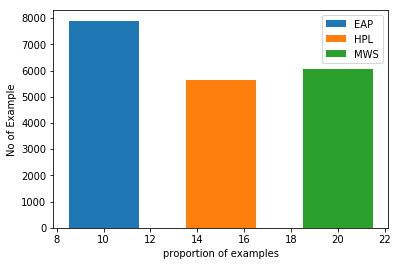

In [10]:
plt.bar(10, EAL_len, 3, label="EAP")
plt.bar(15, HPL_len, 3, label="HPL")
plt.bar(20, MWS_len, 3, label="MWS")
plt.legend()
plt.ylabel("No of Example")
plt.xlabel("proportion of examples")
plt.show()

In [11]:
def remove_punctuation(text):
    import string
    translator=str.maketrans('','', string.punctuation)
    return text.translate(translator)

In [12]:
train['text']=train['text'].apply(remove_punctuation)
train.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [14]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [15]:
print("lenght of stopwords", len(sw))

lenght of stopwords 179


In [16]:
def remove_stopword(text):
    text=[word.lower() for word in text.split() if word.lower() not in sw ]
    return " ,  ".join(text)

In [17]:
train['text']=train['text'].apply(remove_stopword)
train.head(10)

,id,text,author
0,id26305,"process , however , afforded , means , asc...",EAP
1,id17569,"never , occurred , fumbling , might , mere...",HPL
2,id11008,"left , hand , gold , snuff , box , capere...",EAP
3,id27763,"lovely , spring , looked , windsor , terra...",MWS
4,id12958,"finding , nothing , else , even , gold , ...",HPL
5,id22965,"youth , passed , solitude , best , years ,...",MWS
6,id09674,"astronomer , perhaps , point , took , refu...",EAP
7,id13515,"surcingle , hung , ribands , body",EAP
8,id19322,"knew , could , say , stereotomy , without ...",EAP
9,id00912,"confess , neither , structure , languages ,...",MWS


In [19]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit(train['text'])
dictonary=count_vectorizer.vocabulary_.items()

In [20]:
vocab=[]
count=[]

for key, val in dictonary:
    vocab.append(key)
    count.append(val)
    
vocab_bef_stem=pd.Series(count, index=vocab)
vocab_bef_stem=vocab_bef_stem.sort_values(ascending=False)

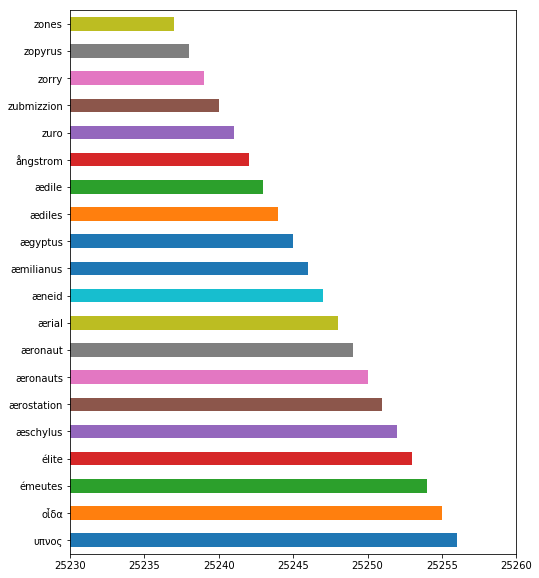

In [23]:
top_vocab=vocab_bef_stem.head(20)
top_vocab.plot(kind='barh', figsize=(8, 10), xlim=(25230, 25260))
plt.show()

In [24]:
stemmer=SnowballStemmer('english')

def stemming(text):
    text=[stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [25]:
train['text']=train['text'].apply(stemming)
train.head(10)

,id,text,author
0,id26305,"process , howev , afford , mean , ascertain , ...",EAP
1,id17569,"never , occur , fumbl , might , mere , mistak",HPL
2,id11008,"left , hand , gold , snuff , box , caper , hil...",EAP
3,id27763,"love , spring , look , windsor , terrac , sixt...",MWS
4,id12958,"find , noth , els , even , gold , superintend ...",HPL
5,id22965,"youth , pass , solitud , best , year , spent ,...",MWS
6,id09674,"astronom , perhap , point , took , refug , sug...",EAP
7,id13515,"surcingl , hung , riband , bodi",EAP
8,id19322,"knew , could , say , stereotomi , without , br...",EAP
9,id00912,"confess , neither , structur , languag , code ...",MWS


In [28]:
tfid_vectorizer=TfidfVectorizer("english")
tfid_vectorizer.fit(train['text'])
dictonary=tfid_vectorizer.vocabulary_.items()

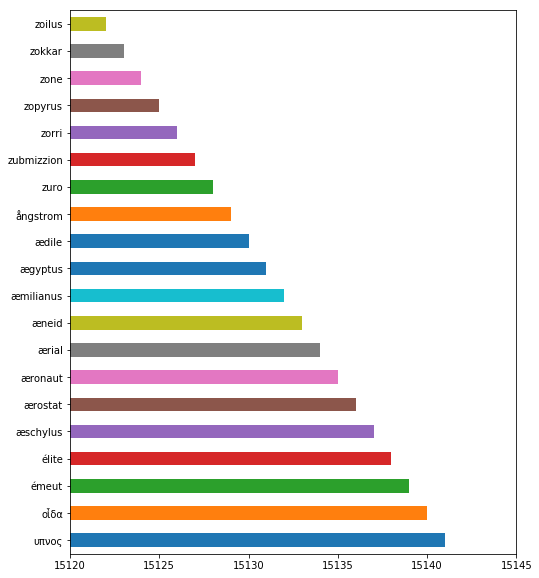

In [31]:
vocab=[]
count=[]

for key, val in dictonary:
    vocab.append(key)
    count.append(val)
    
vocab_afr_stem=pd.Series(count, index=vocab)
vocab_afr_stem=vocab_afr_stem.sort_values(ascending=False)

top_vocab=vocab_afr_stem.head(20)
top_vocab.plot(kind='barh', figsize=(8,10), xlim=(15120, 15145))
plt.show()

In [32]:
def length(text):
    return len(text)

In [33]:
train['length']=train['text'].apply(length)
train.head(10)

,id,text,author,length
0,id26305,"process , howev , afford , mean , ascertain , ...",EAP,176
1,id17569,"never , occur , fumbl , might , mere , mistak",HPL,45
2,id11008,"left , hand , gold , snuff , box , caper , hil...",EAP,149
3,id27763,"love , spring , look , windsor , terrac , sixt...",MWS,177
4,id12958,"find , noth , els , even , gold , superintend ...",HPL,132
5,id22965,"youth , pass , solitud , best , year , spent ,...",MWS,343
6,id09674,"astronom , perhap , point , took , refug , sug...",EAP,97
7,id13515,"surcingl , hung , riband , bodi",EAP,31
8,id19322,"knew , could , say , stereotomi , without , br...",EAP,349
9,id00912,"confess , neither , structur , languag , code ...",MWS,100


In [34]:
EAP_data=train[train['author']=='EAP']
HPL_data=train[train['author']=='HPL']
MWS_data=train[train['author']=='MWS']

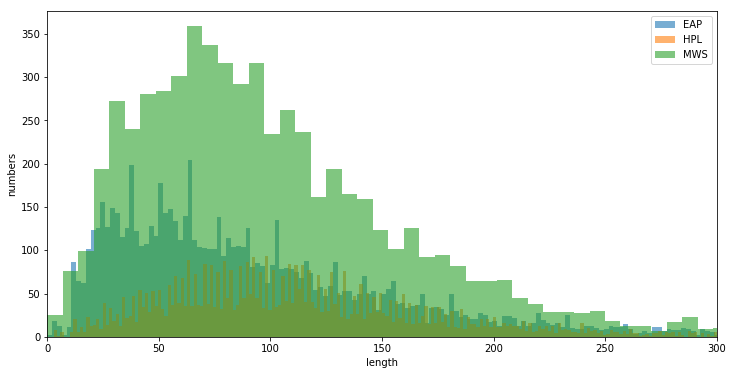

In [39]:
plt.rcParams['figure.figsize']=(12.0, 6.0)
bins=500
plt.hist(EAP_data['length'], alpha=0.6, bins=bins, label="EAP")
plt.hist(HPL_data['length'], alpha=0.6, bins=bins, label="HPL")
plt.hist(MWS_data['length'], alpha=0.6, bins=bins, label="MWS")
plt.xlabel("length")
plt.ylabel("numbers")
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.show()

In [40]:
EAP_tfid_vectorize=TfidfVectorizer("english")
EAP_tfid_vectorize.fit(EAP_data['text'])
EAP_dictonary=EAP_tfid_vectorize.vocabulary_.items()

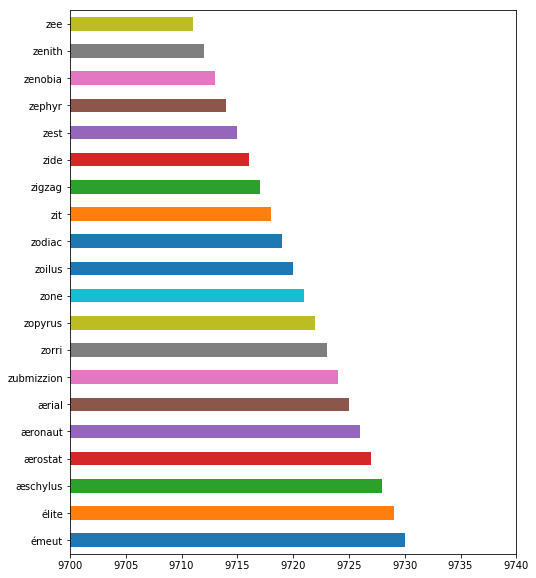

In [42]:
vocab=[]
count=[]

for key, val in EAP_dictonary:
    vocab.append(key)
    count.append(val)
    
EAP_vocab=pd.Series(count, index=vocab)
EAP_vocab=EAP_vocab.sort_values(ascending=False)

top_vocab=EAP_vocab.head(20)
top_vocab.plot(kind='barh', figsize=(8,10), xlim=(9700, 9740))
plt.show()

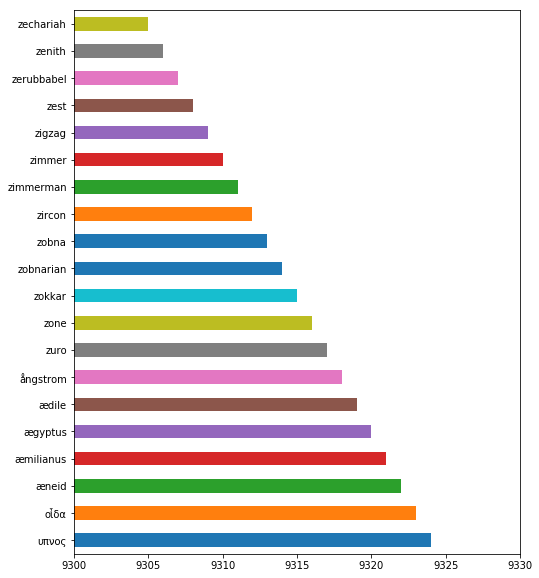

In [44]:
HPL_tfid_vectorize=TfidfVectorizer('english')
HPL_tfid_vectorize.fit(HPL_data['text'])

HPL_dictonary=HPL_tfid_vectorize.vocabulary_.items()

vocab=[]
count=[]

for key, val in HPL_dictonary:
    vocab.append(key)
    count.append(val)
    
HPL_vocab=pd.Series(count, index=vocab)
HPL_vocab=HPL_vocab.sort_values(ascending=False)

top_vocab=HPL_vocab.head(20)
top_vocab.plot(kind='barh', figsize=(8,10), xlim=(9300, 9330))
plt.show()

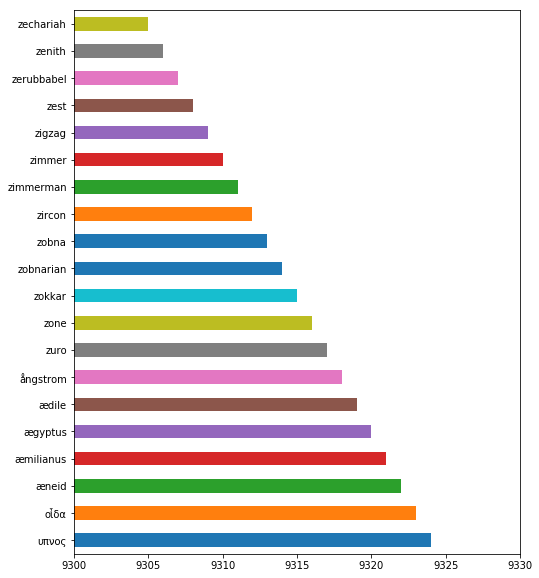

In [46]:
MWS_tfid_vectorize=TfidfVectorizer('english')
MWS_tfid_vectorize.fit(MWS_data['text'])

MWS_dictonary=MWS_tfid_vectorize.vocabulary_.items()

vocab=[]
count=[]

for key, val in HPL_dictonary:
    vocab.append(key)
    count.append(val)
    
MWS_vocab=pd.Series(count, index=vocab)
MWS_vocab=HPL_vocab.sort_values(ascending=False)

top_vocab=MWS_vocab.head(20)
top_vocab.plot(kind='barh', figsize=(8,10), xlim=(9300, 9330))
plt.show()

In [49]:
tfid_matrix=tfid_vectorizer.transform(train['text'])
array=tfid_matrix.todense()

In [50]:
df=pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df['output']=train['author']
df['id']=train['id']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15134,15135,15136,15137,15138,15139,15140,15141,output,id
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id26305
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id17569
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id11008
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id27763
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HPL,id12958
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id22965
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id09674
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id13515
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EAP,id19322
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MWS,id00912


In [53]:
feature=df.columns.tolist()
output='output'
feature.remove(output)
feature.remove('id')

In [54]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [56]:
alpha_list=np.linspace(0.006,0.1, 20 )
alpha_list=np.around(alpha_list, decimals=4)
alpha_list

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [57]:
parameter_grid=[{"alpha":alpha_list}]

In [ ]:
classifier1=MultinomialNB()
gridserach=GridSearchCV(classifier1, parameter_grid, scoring='neg_log_loss', cv=4)
gridserach.fit(df[feature], df[output])

In [ ]:
results1=pd.DataFrame()
